In [3]:
import sys
sys.path.append('/home/daisy/geuv/code/transethnic_prs-main/')
print(sys.path)

['/home/daisy/geuv', '/home/daisy/geuv/code/transethnic_prs-main/transethnic_prs', '/home/daisy/geuv', '/home/daisy/anaconda3/envs/transethnic_prs/lib/python37.zip', '/home/daisy/anaconda3/envs/transethnic_prs/lib/python3.7', '/home/daisy/anaconda3/envs/transethnic_prs/lib/python3.7/lib-dynload', '', '/home/daisy/anaconda3/envs/transethnic_prs/lib/python3.7/site-packages', '/home/daisy/anaconda3/envs/transethnic_prs/lib/python3.7/site-packages/IPython/extensions', '/home/daisy/.ipython', '/home/daisy/geuv/code/transethnic_prs-main/']


In [4]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path, enet_path
import transethnic_prs.model1.Model1Blk as model1blk

In [241]:
pheno_total = pd.read_csv('data/GD462.GeneQuantRPKM.50FN.samplename.resk10.txt', sep = '\t', index_col = 'TargetID')
target_pheno_total = pheno_total.loc['ENSG00000167074.9']

b_hat_eur_total = pd.read_csv('data/EUR373.gene.cis.FDR5.all.rs137.txt', sep = '\t')
b_hat_eur_total_grouped = dict(list(b_hat_eur_total.groupby('GENE_ID')))
b_hat_eur_target = b_hat_eur_total_grouped['ENSG00000167074.9']

eur_sample = pd.read_csv('data/clean/eur_genotype.012.indv', sep = '\t', header = None)
afr_sample = pd.read_csv('data/clean/afr_genotype.012.indv', sep = '\t',header = None)

target_pheno_eur = pd.merge(target_pheno_total, eur_sample, left_index = True, right_on = 0)
target_pheno_afr = pd.merge(target_pheno_total, afr_sample, left_index = True, right_on = 0)

eur_genotype = pd.read_csv('data/clean/eur_genotype.012', sep = '\t', header = None, index_col = 0)
afr_genotype = pd.read_csv('data/clean/afr_genotype.012', sep = '\t', header = None, index_col = 0)

pa = target_pheno_afr.set_index(0)
pe = target_pheno_eur.set_index(0)

sorted_eur_pheno = pd.merge(eur_sample, pe, left_on = 0 , right_index = True, how = 'left')
sorted_afr_pheno = pd.merge(afr_sample, pa, left_on = 0 , right_index = True, how = 'left')
sorted_b_hat_eur = b_hat_eur_target.sort_values(by = 'SNPpos')

X1 = eur_genotype
X2 = afr_genotype
b1_hat = sorted_b_hat_eur['rvalue']
y1 = sorted_eur_pheno['ENSG00000167074.9']
y2 = sorted_afr_pheno['ENSG00000167074.9']

print(X2.std().shape)
for idx,x in enumerate(X2.std()):
    if x==0:
        print(idx)
        print(x)
        X2[idx] = np.zeros(89)
        X2.std()[idx] = 1.0
        print(x)
np.isnan(X2).any(axis=0)

(869,)
13
0.0
0.0
94
0.0
0.0
111
0.0
0.0
160
0.0
0.0
163
0.0
0.0
216
0.0
0.0
217
0.0
0.0
224
0.0
0.0
226
0.0
0.0
229
0.0
0.0
263
0.0
0.0
267
0.0
0.0
270
0.0
0.0
301
0.0
0.0
303
0.0
0.0
304
0.0
0.0
309
0.0
0.0
311
0.0
0.0
313
0.0
0.0
314
0.0
0.0
315
0.0
0.0
316
0.0
0.0
321
0.0
0.0
327
0.0
0.0
334
0.0
0.0
413
0.0
0.0
416
0.0
0.0
417
0.0
0.0
433
0.0
0.0
434
0.0
0.0
448
0.0
0.0
502
0.0
0.0
521
0.0
0.0
523
0.0
0.0
528
0.0
0.0
531
0.0
0.0
534
0.0
0.0
541
0.0
0.0
542
0.0
0.0
544
0.0
0.0
549
0.0
0.0
550
0.0
0.0
551
0.0
0.0
552
0.0
0.0
556
0.0
0.0
559
0.0
0.0
561
0.0
0.0
562
0.0
0.0
565
0.0
0.0
566
0.0
0.0
569
0.0
0.0
572
0.0
0.0
573
0.0
0.0
575
0.0
0.0
577
0.0
0.0
584
0.0
0.0
590
0.0
0.0
593
0.0
0.0
600
0.0
0.0
601
0.0
0.0
608
0.0
0.0
609
0.0
0.0
611
0.0
0.0
621
0.0
0.0
624
0.0
0.0
627
0.0
0.0
632
0.0
0.0
642
0.0
0.0
644
0.0
0.0
649
0.0
0.0
653
0.0
0.0
654
0.0
0.0
657
0.0
0.0
658
0.0
0.0
660
0.0
0.0
664
0.0
0.0
670
0.0
0.0
679
0.0
0.0
681
0.0
0.0
684
0.0
0.0
694
0.0
0.0
700
0.0
0.0
705
0.0
0.0

1      False
2      False
3      False
4      False
5      False
       ...  
865    False
866    False
867    False
868    False
869    False
Length: 869, dtype: bool

In [240]:
#standardizing
X1 = (X1-X1.mean())/X1.std()
X2 = (X2-X2.mean())/X2.std()
y1 = (y1-y1.mean())/y1.std()
y2 = (y2-y2.mean())/y2.std()
N1 = 373
N2 = 89
R1 = X1.cov()
D_R1 = np.diag(np.diag(R1))
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [252]:
X1 = np.array(X1,dtype = np.float64,order = 'C')
X2 = np.array(X2,dtype = np.float64,order = 'C')
b1_hat = np.array(b1_hat, dtype = np.float64,order = 'C')
y1 = np.array(y1, dtype = np.float64, order = 'C')
y2 = np.array(y2, dtype = np.float64, order = 'C')
R1 = np.array(R1,dtype = np.float64, order = 'C')
print(X1.shape,X1.dtype)
print(X2.shape,X2.dtype)
print(y1.shape,y1.dtype)
print(y2.shape,y2.dtype)
for idx, x in enumerate(X2):
    for idx2, x2 in enumerate(x):
        if x2 == 'nan':
            X2[idx][idx2] = 0
print(X2)
np.isnan(X2).any(axis=0)

(373, 869) float64
(89, 869) float64
(373,) float64
(89,) float64
[[-0.19101124 -0.62921348 -0.25842697 ... -0.29213483 -0.29213483
  -0.21348315]
 [ 0.80898876  0.37078652  0.74157303 ...  0.70786517  0.70786517
   0.78651685]
 [-0.19101124 -0.62921348 -0.25842697 ...  0.70786517  0.70786517
  -0.21348315]
 ...
 [-0.19101124  1.37078652  0.74157303 ... -0.29213483 -0.29213483
  -0.21348315]
 [ 0.80898876  0.37078652  0.74157303 ... -0.29213483 -0.29213483
  -0.21348315]
 [-0.19101124 -0.62921348 -0.25842697 ... -0.29213483 -0.29213483
  -0.21348315]]


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [268]:
b1 = X1.T @ y1
A1 = X1.T @ X1
print(b1)

[ 459.81183269  634.48158465  623.33595679  634.48158465  634.48158465
  634.48158465  630.13024322  627.66043619  599.07228706  474.12634068
  497.11767066  617.07818439  621.65161279  460.99921801  636.11391715
  632.55281638  634.48158465  470.19244188  417.70110296  466.03785847
  466.2401519   477.00136706  473.40487471  482.85466596  473.40487471
  473.40487471  475.8210344   475.75476161  471.66316345  427.09243631
  475.8210344   476.70497303  503.60863138  475.8210344   470.81200305
  648.51057747  445.49548409  471.80239836  471.80239836  492.06906748
  460.5299383   471.80239836  632.39150654  621.26167289  632.10714175
  477.52658787  477.52658787  477.52658787  475.31515677  477.52658787
  628.57142682  632.41773763  477.52658787  477.52658787  382.91115234
  419.48169429  632.41773763  632.41773763  632.41773763  630.60879627
  473.64400073  441.02954813  471.52316123  452.84589002  473.64400073
  459.68260767  477.3274075   470.27225662  473.64400073  473.64400073
  611.

In [244]:
print(A1.shape,A1.dtype,A1.flags)
print(b1.shape,b1.dtype, b1.flags)
print(X1.shape,X1.dtype,X1.flags)
print(X2.shape,X2.dtype,X2.flags)
print(y2.shape,y2.dtype, y2.flags)
type(X2)
X2

(869, 869) float64   C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

(869,) float64   C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

(373, 869) float64   C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

(89, 869) float64   C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

(89,) float64   C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 2., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Yanyu's solver

In [245]:
mod1 = model1blk.Model1Blk([A1], [b1], [X2], y2)

In [246]:
l1_ratio = 0.1
t = time.time()
beta_mat_en, lambda_seq_en, niters_en, tols_en, convs_en = mod1.solve_path(alpha=l1_ratio) 
print(f'Run time = {time.time()-t} s')

Run time = 5.966909408569336 s


In [247]:
# lasso 
t = time.time()
beta_mat_lasso, lambda_seq_lasso, niters_lasso, tols_lasso, convs_lasso = mod1.solve_path(alpha=1) 
print(f'Run time = {time.time()-t} s')

Run time = 1.890784502029419 s


In [203]:
from scipy import optimize

In [248]:
def lasso_fun(beta):
    betaT_R1 = np.dot(beta.T, R1)
    D_R1 = np.diag(np.diag(R1))
    b1T_D_R1 = np.dot(b1.T, D_R1)
    term1 = (np.dot(betaT_R1, beta) - 2 * np.dot(b1T_D_R1, beta))
    term2 = np.linalg.norm(y2 - np.dot(X2, beta))**2 #L2 norm should be squared here(least square)
    penalty = np.linalg.norm(beta, ord = 1)
    return term1 + term2 + penalty

In [249]:
beta = b1

In [250]:
#lasso model
t = time.time()
result = optimize.minimize(lasso_fun, beta)
print(f'Run time = {time.time()-t} s')
print(X2)
beta_hat_ls = np.array(result.x, order = 'C')
beta_hat_ls.dtype

Run time = 768.6824514865875 s
[[-0.19101124 -0.62921348 -0.25842697 ... -0.29213483 -0.29213483
  -0.21348315]
 [ 0.80898876  0.37078652  0.74157303 ...  0.70786517  0.70786517
   0.78651685]
 [-0.19101124 -0.62921348 -0.25842697 ...  0.70786517  0.70786517
  -0.21348315]
 ...
 [-0.19101124  1.37078652  0.74157303 ... -0.29213483 -0.29213483
  -0.21348315]
 [ 0.80898876  0.37078652  0.74157303 ... -0.29213483 -0.29213483
  -0.21348315]
 [-0.19101124 -0.62921348 -0.25842697 ... -0.29213483 -0.29213483
  -0.21348315]]


dtype('float64')

In [251]:
#EN model
def EN(beta):
    A = (N1-1) * R1 + np.dot(X2.T,X2)
    b = (N1-1) * np.dot(D_R1,b1) + np.dot(X2.T,y2)
    term1 = np.dot(np.dot(beta.T,A), beta)-2*np.dot(b1.T, beta)
    ridge = w1*np.linalg.norm(beta)**2
    lasso = w2*np.linalg.norm(beta, ord = 1)
    return term1 + ridge + lasso
w1 = 1
w2 = 1
t = time.time()
result_EN = optimize.minimize(EN,beta)
print(f'Run time = {time.time()-t} s')

Run time = 4709.288578510284 s


In [258]:
print(X2)

[[-0.19101124 -0.62921348 -0.25842697 ... -0.29213483 -0.29213483
  -0.21348315]
 [ 0.80898876  0.37078652  0.74157303 ...  0.70786517  0.70786517
   0.78651685]
 [-0.19101124 -0.62921348 -0.25842697 ...  0.70786517  0.70786517
  -0.21348315]
 ...
 [-0.19101124  1.37078652  0.74157303 ... -0.29213483 -0.29213483
  -0.21348315]
 [ 0.80898876  0.37078652  0.74157303 ... -0.29213483 -0.29213483
  -0.21348315]
 [-0.19101124 -0.62921348 -0.25842697 ... -0.29213483 -0.29213483
  -0.21348315]]


(869, 99)
[[ 0.0059667 ]
 [-0.02757307]
 [-0.08276602]
 [-0.12356366]
 [ 0.0041627 ]
 [ 0.08122582]
 [ 0.0724153 ]
 [-0.03791476]
 [ 0.2077832 ]
 [ 0.06061408]
 [ 0.03746594]
 [-0.13161244]
 [-0.04044995]
 [ 0.08192929]
 [-0.18042353]
 [-0.10521806]
 [-0.08936454]
 [-0.11114568]
 [-0.07770233]
 [ 0.27362208]
 [ 0.04179599]
 [ 0.06126056]
 [-0.2135113 ]
 [ 0.10311885]
 [-0.00201506]
 [ 0.15564525]
 [ 0.02422383]
 [ 0.04177247]
 [-0.00930097]
 [-0.17310157]
 [ 0.00507691]
 [-0.0647609 ]
 [-0.02164337]
 [ 0.11205923]
 [ 0.17133735]
 [ 0.19103707]
 [-0.02133143]
 [ 0.15347197]
 [ 0.08098653]
 [-0.10880066]
 [-0.02007362]
 [ 0.16411336]
 [-0.11334712]
 [ 0.12587228]
 [-0.07819269]
 [ 0.02282816]
 [ 0.04009243]
 [ 0.01178067]
 [-0.01018154]
 [ 0.01178067]
 [ 0.11501117]
 [ 0.05999957]
 [-0.21109832]
 [-0.12066145]
 [ 0.13143567]
 [ 0.0676692 ]
 [-0.09284911]
 [-0.05441584]
 [-0.09679849]
 [-0.1403672 ]
 [ 0.05815072]
 [-0.02847939]
 [-0.22960411]
 [ 0.05373846]
 [ 0.11483958]
 [ 0.07559063]


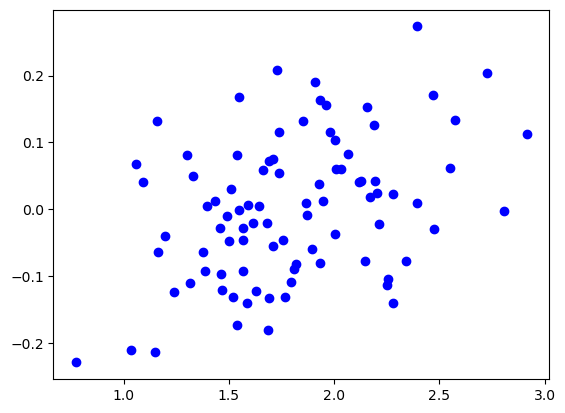

In [267]:
y2_hat_lasso = X2 @ beta_mat_lasso[:,-1:]
print(beta_mat_lasso[:,:-1].shape)
print(y2_hat_lasso)
print(y2)
y2_hat_en = X2 @ result_EN.x
plt.scatter(y2, y2_hat_lasso, color = "blue")
plt.show()